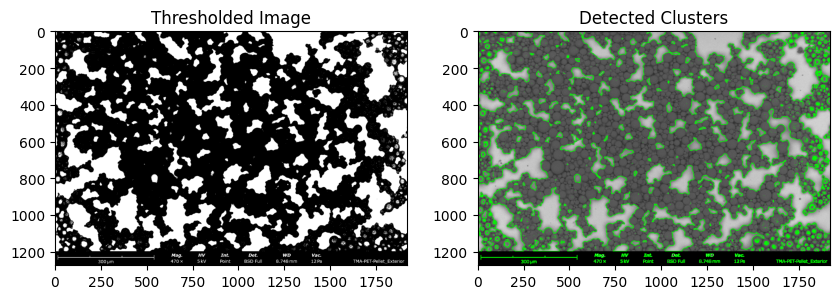

Number of detected clusters: 5103
Average cluster area: 138.8284342543602
Average cluster perimeter: 16.10632318542117


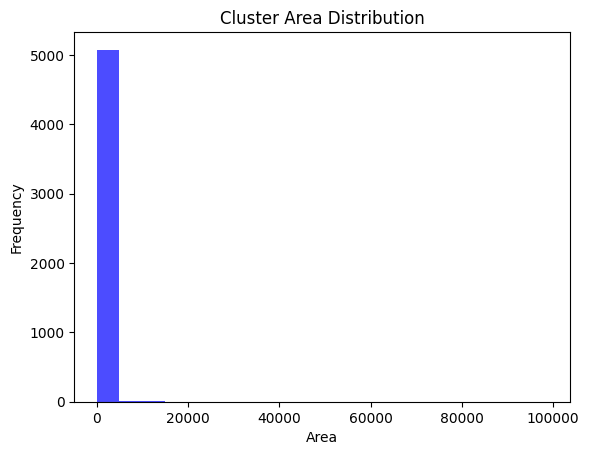

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = '/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (2).jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold
_, thresholded = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Find contours of the clusters
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image for visualization
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Show the original thresholded image and contours for comparison
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Detected Clusters')

plt.show()

# Cluster analysis
print(f'Number of detected clusters: {len(contours)}')

# Optional: Analyze properties of clusters (e.g., area, perimeter)
cluster_areas = [cv2.contourArea(cnt) for cnt in contours]
cluster_perimeters = [cv2.arcLength(cnt, True) for cnt in contours]

print(f'Average cluster area: {np.mean(cluster_areas)}')
print(f'Average cluster perimeter: {np.mean(cluster_perimeters)}')

# Display histogram of cluster sizes
plt.hist(cluster_areas, bins=20, color='blue', alpha=0.7)
plt.title('Cluster Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()


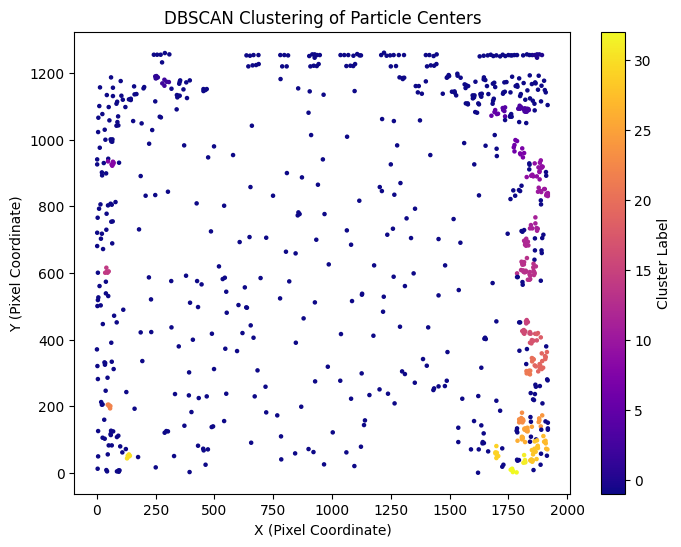

Number of detected clusters: 33


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Load the image in grayscale
image_path = '/workspaces/Python_Physics/Images/PDVB Butanol 4% wt to vol (2).jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to the image
_, thresholded_img = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the center of each particle (contour)
particles = []
for contour in contours:
    M = cv2.moments(contour)
    if M["m00"] != 0:  # To avoid division by zero
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        particles.append([cX, cY])

# Convert particles list to a NumPy array
particles = np.array(particles)

# Ensure there are particles detected before proceeding
if len(particles) > 0:
    # Set DBSCAN parameters
    dbscan = DBSCAN(eps=20, min_samples=5)  # Adjust `eps` and `min_samples` based on image scaling
    labels = dbscan.fit_predict(particles)

    # Plot the clustered particles
    plt.figure(figsize=(8,6))
    plt.scatter(particles[:, 0], particles[:, 1], c=labels, cmap='plasma', s=5)
    plt.title('DBSCAN Clustering of Particle Centers')
    plt.xlabel('X (Pixel Coordinate)')
    plt.ylabel('Y (Pixel Coordinate)')
    plt.colorbar(label='Cluster Label')
    plt.show()

    # Print basic cluster info
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels) - (1 if -1 in labels else 0)  # Exclude noise (-1 label)
    print(f'Number of detected clusters: {num_clusters}')
else:
    print("No particles detected.")
